In [7]:
import pandas as pd
import numpy as np
from proccessvitext import *
import matplotlib.pyplot as plt

In [8]:
input_path_file = ['data/UIT-ViON_train.csv', 'data/UIT-ViON_test.csv', 'data/UIT-ViON_dev.csv']

output_path_file = ['data/preprocess/UIT-ViON_train_preprocessed.csv', 'data/preprocess/UIT-ViON_test_preprocessed.csv', 'data/preprocess/UIT-ViON_dev_preprocessed.csv']
df = pd.read_csv(input_path_file[0])
df_test = pd.read_csv(input_path_file[1])
df_dev = pd.read_csv(input_path_file[2])
print(df.shape)
print(df_test.shape)
print(df_dev.shape)
df.head()

(208000, 3)
(26000, 3)
(26000, 3)


,title,link,label
0,vieri ronaldo giỏi hơn cristiano_ronaldo,https://vnexpress.net/vieri-ronaldo-gioi-hon-c...,9
1,phúc_thẩm vụ vn pharma triệu_tập thứ_trưởng bộ...,https://dantri.com.vn/phap-luat/phuc-tham-vu-v...,6
2,tử_tù hiến tạng hiến xác khó thực_hiện,https://dantri.com.vn/xa-hoi/tu-tu-hien-tang-h...,6
3,điểm_chuẩn trường đh văn_hoá tphcm đh hoa_sen,https://dantri.com.vn/giao-duc-huong-nghiep/di...,2
4,5 hành_tinh sáng nhất xếp thẳng hàng trong thá...,https://vnexpress.net/5-hanh-tinh-sang-nhat-xe...,4


In [9]:
# In ra các dòng bị trùng ở cột link
duplicated_links = df[df.duplicated(subset=['link'], keep=False)]
print(f"\nNumber of duplicated rows: {len(duplicated_links)}")
duplicated_links = df_test[df_test.duplicated(subset=['link'], keep=False)]
print(f"\nNumber of duplicated rows in test: {len(duplicated_links)}")
duplicated_links = df_dev[df_dev.duplicated(subset=['link'], keep=False)]
print(f"\nNumber of duplicated rows in dev: {len(duplicated_links)}")

# Xóa các dòng bị trùng lặp link
df = df.drop_duplicates(subset=['link'], keep='first')
print(f"\nAfter removing duplicates link: {df.shape}")
df_test = df_test.drop_duplicates(subset=['link'], keep='first')
print(f"\nAfter removing duplicates link in test: {df_test.shape}")
df_dev = df_dev.drop_duplicates(subset=['link'], keep='first')
print(f"\nAfter removing duplicates link in dev: {df_dev.shape}")
df.head()


Number of duplicated rows: 1072

Number of duplicated rows in test: 12

Number of duplicated rows in dev: 19

After removing duplicates link: (207459, 3)

After removing duplicates link in test: (25994, 3)

After removing duplicates link in dev: (25990, 3)


,title,link,label
0,vieri ronaldo giỏi hơn cristiano_ronaldo,https://vnexpress.net/vieri-ronaldo-gioi-hon-c...,9
1,phúc_thẩm vụ vn pharma triệu_tập thứ_trưởng bộ...,https://dantri.com.vn/phap-luat/phuc-tham-vu-v...,6
2,tử_tù hiến tạng hiến xác khó thực_hiện,https://dantri.com.vn/xa-hoi/tu-tu-hien-tang-h...,6
3,điểm_chuẩn trường đh văn_hoá tphcm đh hoa_sen,https://dantri.com.vn/giao-duc-huong-nghiep/di...,2
4,5 hành_tinh sáng nhất xếp thẳng hàng trong thá...,https://vnexpress.net/5-hanh-tinh-sang-nhat-xe...,4


In [10]:
# In ra các dòng bị trùng ở cột title
duplicated_titles = df[df.duplicated(subset=['title'], keep=False)]
print(f"\nNumber of duplicated rows: {len(duplicated_titles)}")
duplicated_titles = df_test[df_test.duplicated(subset=['title'], keep=False)]
print(f"\nNumber of duplicated rows in test: {len(duplicated_titles)}")
duplicated_titles = df_dev[df_dev.duplicated(subset=['title'], keep=False)]
print(f"\nNumber of duplicated rows in dev: {len(duplicated_titles)}")

# Xóa các dòng bị trùng lặp title
df = df.drop_duplicates(subset=['title'], keep='first')
print(f"\nAfter removing duplicates title: {df.shape}")
df_test = df_test.drop_duplicates(subset=['title'], keep='first')
print(f"\nAfter removing duplicates title in test: {df_test.shape}")
df_dev = df_dev.drop_duplicates(subset=['title'], keep='first')
print(f"\nAfter removing duplicates title in dev: {df_dev.shape}")
df.head()


Number of duplicated rows: 1964

Number of duplicated rows in test: 44

Number of duplicated rows in dev: 45

After removing duplicates title: (206411, 3)

After removing duplicates title in test: (25972, 3)

After removing duplicates title in dev: (25967, 3)


,title,link,label
0,vieri ronaldo giỏi hơn cristiano_ronaldo,https://vnexpress.net/vieri-ronaldo-gioi-hon-c...,9
1,phúc_thẩm vụ vn pharma triệu_tập thứ_trưởng bộ...,https://dantri.com.vn/phap-luat/phuc-tham-vu-v...,6
2,tử_tù hiến tạng hiến xác khó thực_hiện,https://dantri.com.vn/xa-hoi/tu-tu-hien-tang-h...,6
3,điểm_chuẩn trường đh văn_hoá tphcm đh hoa_sen,https://dantri.com.vn/giao-duc-huong-nghiep/di...,2
4,5 hành_tinh sáng nhất xếp thẳng hàng trong thá...,https://vnexpress.net/5-hanh-tinh-sang-nhat-xe...,4


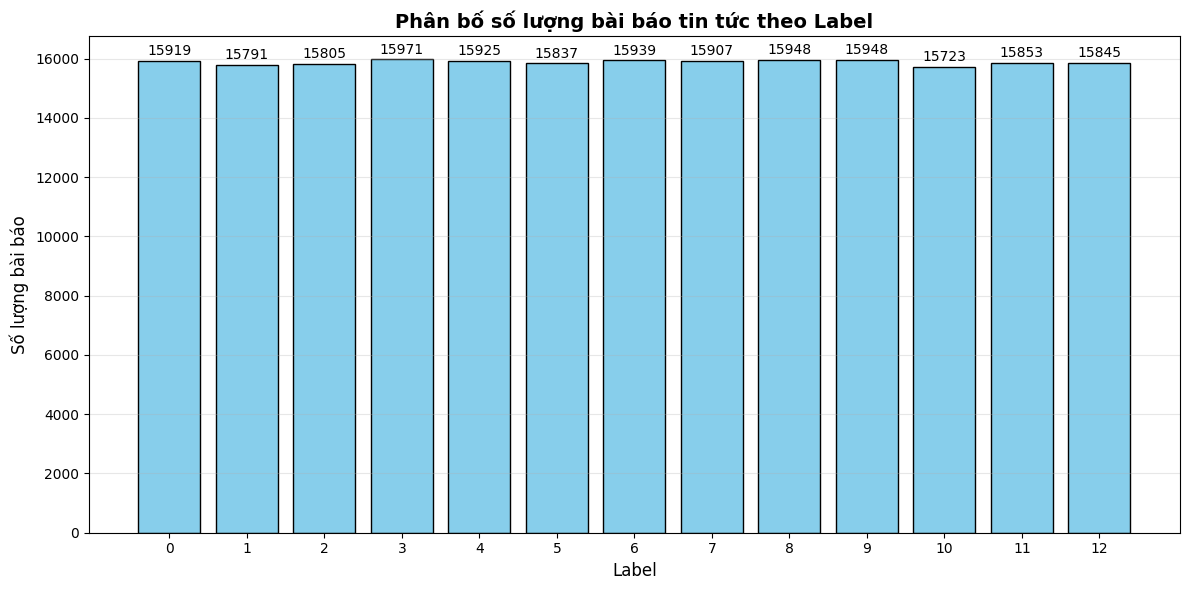


Thống kê số lượng bài báo theo label:
label
0     15919
1     15791
2     15805
3     15971
4     15925
5     15837
6     15939
7     15907
8     15948
9     15948
10    15723
11    15853
12    15845
Name: count, dtype: int64


In [11]:
# Đếm số lượng bài báo theo từng label
label_counts = df['label'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Số lượng bài báo', fontsize=12)
plt.title('Phân bố số lượng bài báo tin tức theo Label', fontsize=14, fontweight='bold')
plt.xticks(label_counts.index)
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị trên mỗi cột
for i, v in enumerate(label_counts.values):
    plt.text(label_counts.index[i], v + 200, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# In thông tin chi tiết
print("\nThống kê số lượng bài báo theo label:")
print(label_counts)

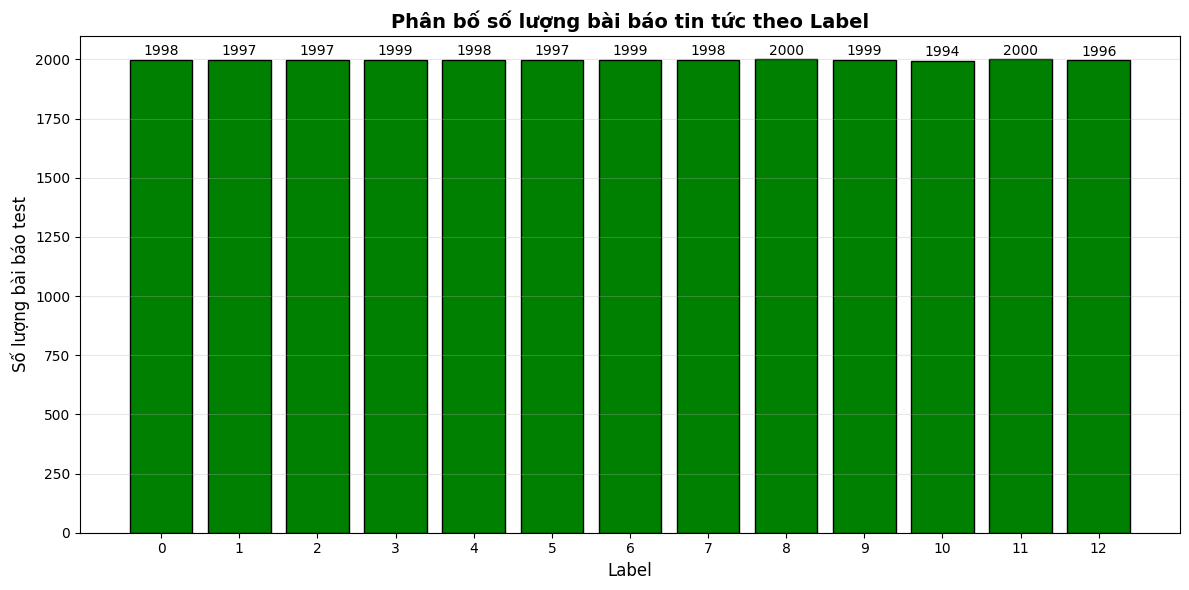


Thống kê số lượng bài báo theo label:
label
0     1998
1     1997
2     1997
3     1999
4     1998
5     1997
6     1999
7     1998
8     2000
9     1999
10    1994
11    2000
12    1996
Name: count, dtype: int64


In [17]:
# Đếm số lượng bài báo theo từng label
label_counts = df_test['label'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(label_counts.index, label_counts.values, color='green', edgecolor='black')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Số lượng bài báo test', fontsize=12)
plt.title('Phân bố số lượng bài báo tin tức theo Label', fontsize=14, fontweight='bold')
plt.xticks(label_counts.index)
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị trên mỗi cột
for i, v in enumerate(label_counts.values):
    plt.text(label_counts.index[i], v + 20, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# In thông tin chi tiết
print("\nThống kê số lượng bài báo theo label:")
print(label_counts)

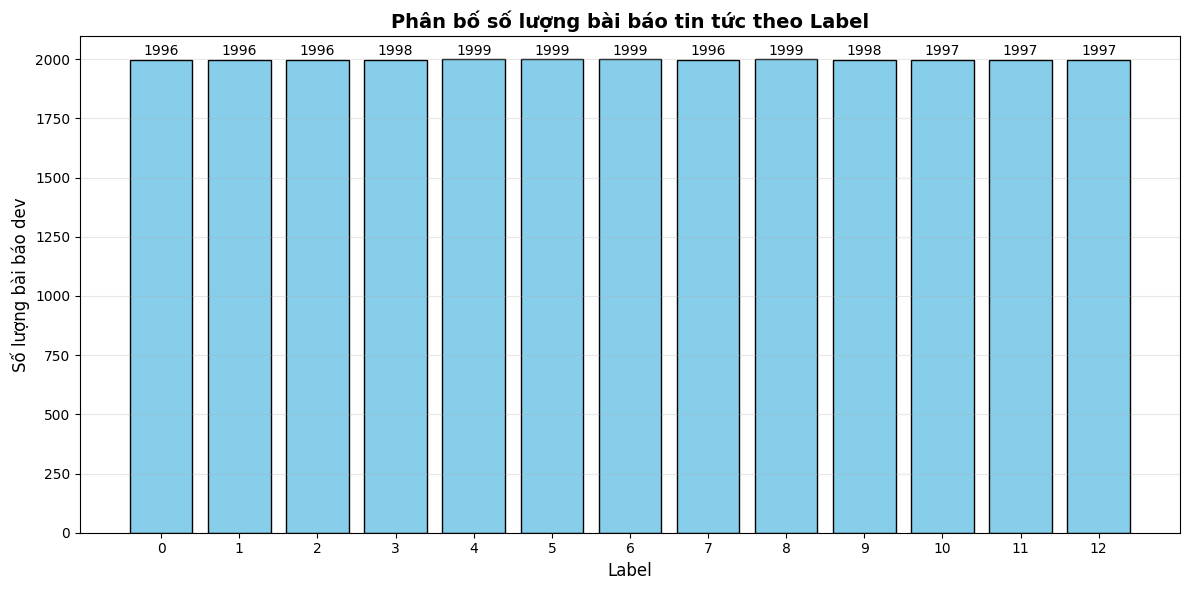


Thống kê số lượng bài báo theo label:
label
0     1996
1     1996
2     1996
3     1998
4     1999
5     1999
6     1999
7     1996
8     1999
9     1998
10    1997
11    1997
12    1997
Name: count, dtype: int64


In [18]:
# Đếm số lượng bài báo theo từng label
label_counts = df_dev['label'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Số lượng bài báo dev', fontsize=12)
plt.title('Phân bố số lượng bài báo tin tức theo Label', fontsize=14, fontweight='bold')
plt.xticks(label_counts.index)
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị trên mỗi cột
for i, v in enumerate(label_counts.values):
    plt.text(label_counts.index[i], v + 20, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# In thông tin chi tiết
print("\nThống kê số lượng bài báo theo label:")
print(label_counts)

In [19]:
df.to_csv(output_path_file[0], index=False)
df_test.to_csv(output_path_file[1], index=False)
df_dev.to_csv(output_path_file[2], index=False)